In [1]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from bokeh.palettes import inferno

import keras
from keras.models import Sequential
from keras.layers import Dense

/home/philipp/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Deep Neural Network (DNN)
## Approximation einer eindimensionalen statischen Nichtlinearität mit Hilfe eines Multilayer Perceptron (MLP)

### $\mathcal{NL}(u) = 3 \arctan(2u) + 5$

In [2]:
# zu lernende Nichtlinearität
def nl(u):
    return 3 * np.arctan(2*u) + 5

k = 1000 # Anzahl der Samples
x = np.reshape(np.linspace(-5, 5, k), (k, 1))

# --- Multilayer Perceptron ---
hidden_layers = [16, 16, 16, 16, 16]

model = Sequential()
# Hidden Layers
for i, num_units in enumerate(hidden_layers):
    if i==0: # Input Layer
        model.add(Dense(units=num_units,
                        activation='sigmoid',
                        input_shape=(1, )))
    else:              
        model.add(Dense(units=num_units,
                        activation='sigmoid'))

# Output Layer
model.add(Dense(units=1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')
# ------------------------------

start_time = time.time()

# Training des MLPs
model.fit(x=x,
          y=nl(x),
          batch_size=100,
          epochs=500,
          shuffle=True,
          verbose=1,  # 0 = silent, 1 = progress bar, 2 = one line per epoch
          callbacks=[keras.callbacks.TensorBoard()])


print(f"[INFO] Finished model training after {time.time() - start_time:.4f} seconds.")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 1,137
Trainable params: 1,137
Non-trainable params: 0
_________________________________________________________________
Instruct

1000/1000 [==============================] - 0s 34us/step - loss: 0.3230
Epoch 79/500
1000/1000 [==============================] - 0s 32us/step - loss: 0.3090
Epoch 80/500
1000/1000 [==============================] - 0s 34us/step - loss: 0.2953
Epoch 81/500
1000/1000 [==============================] - 0s 32us/step - loss: 0.2834
Epoch 82/500
1000/1000 [==============================] - 0s 32us/step - loss: 0.2702
Epoch 83/500
1000/1000 [==============================] - 0s 31us/step - loss: 0.2585
Epoch 84/500
1000/1000 [==============================] - 0s 37us/step - loss: 0.2478
Epoch 85/500
1000/1000 [==============================] - 0s 50us/step - loss: 0.2355
Epoch 86/500
1000/1000 [==============================] - 0s 44us/step - loss: 0.2249
Epoch 87/500
1000/1000 [==============================] - 0s 41us/step - loss: 0.2136
Epoch 88/500
1000/1000 [==============================] - 0s 33us/step - loss: 0.2002
Epoch 89/500
1000/1000 [==============================] - 0s 30us/s

1000/1000 [==============================] - 0s 43us/step - loss: 0.0079
Epoch 173/500
1000/1000 [==============================] - 0s 49us/step - loss: 0.0079
Epoch 174/500
1000/1000 [==============================] - 0s 44us/step - loss: 0.0079
Epoch 175/500
1000/1000 [==============================] - 0s 36us/step - loss: 0.0078
Epoch 176/500
1000/1000 [==============================] - 0s 45us/step - loss: 0.0078
Epoch 177/500
1000/1000 [==============================] - 0s 43us/step - loss: 0.0077
Epoch 178/500
1000/1000 [==============================] - 0s 31us/step - loss: 0.0077
Epoch 179/500
1000/1000 [==============================] - 0s 31us/step - loss: 0.0077
Epoch 180/500
1000/1000 [==============================] - 0s 34us/step - loss: 0.0079
Epoch 181/500
1000/1000 [==============================] - 0s 69us/step - loss: 0.0078
Epoch 182/500
1000/1000 [==============================] - 0s 49us/step - loss: 0.0076
Epoch 183/500
1000/1000 [==============================] 

1000/1000 [==============================] - 0s 34us/step - loss: 0.0056
Epoch 267/500
1000/1000 [==============================] - 0s 34us/step - loss: 0.0056
Epoch 268/500
1000/1000 [==============================] - 0s 38us/step - loss: 0.0056
Epoch 269/500
1000/1000 [==============================] - 0s 32us/step - loss: 0.0056
Epoch 270/500
1000/1000 [==============================] - 0s 32us/step - loss: 0.0056
Epoch 271/500
1000/1000 [==============================] - 0s 30us/step - loss: 0.0056
Epoch 272/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.0055
Epoch 273/500
1000/1000 [==============================] - 0s 30us/step - loss: 0.0056
Epoch 274/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.0055
Epoch 275/500
1000/1000 [==============================] - 0s 30us/step - loss: 0.0056
Epoch 276/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.0055
Epoch 277/500
1000/1000 [==============================] 

1000/1000 [==============================] - 0s 39us/step - loss: 0.0042
Epoch 361/500
1000/1000 [==============================] - 0s 32us/step - loss: 0.0041
Epoch 362/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.0041
Epoch 363/500
1000/1000 [==============================] - 0s 36us/step - loss: 0.0042
Epoch 364/500
1000/1000 [==============================] - 0s 33us/step - loss: 0.0040
Epoch 365/500
1000/1000 [==============================] - 0s 33us/step - loss: 0.0044
Epoch 366/500
1000/1000 [==============================] - 0s 31us/step - loss: 0.0043
Epoch 367/500
1000/1000 [==============================] - 0s 34us/step - loss: 0.0040
Epoch 368/500
1000/1000 [==============================] - 0s 30us/step - loss: 0.0040
Epoch 369/500
1000/1000 [==============================] - 0s 31us/step - loss: 0.0040
Epoch 370/500
1000/1000 [==============================] - 0s 28us/step - loss: 0.0041
Epoch 371/500
1000/1000 [==============================] 

1000/1000 [==============================] - 0s 32us/step - loss: 0.0025
Epoch 455/500
1000/1000 [==============================] - 0s 31us/step - loss: 0.0026
Epoch 456/500
1000/1000 [==============================] - 0s 26us/step - loss: 0.0026
Epoch 457/500
1000/1000 [==============================] - 0s 31us/step - loss: 0.0025
Epoch 458/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.0025
Epoch 459/500
1000/1000 [==============================] - 0s 31us/step - loss: 0.0025
Epoch 460/500
1000/1000 [==============================] - 0s 30us/step - loss: 0.0026
Epoch 461/500
1000/1000 [==============================] - 0s 27us/step - loss: 0.0025
Epoch 462/500
1000/1000 [==============================] - 0s 35us/step - loss: 0.0025
Epoch 463/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.0024
Epoch 464/500
1000/1000 [==============================] - 0s 29us/step - loss: 0.0023
Epoch 465/500
1000/1000 [==============================] 

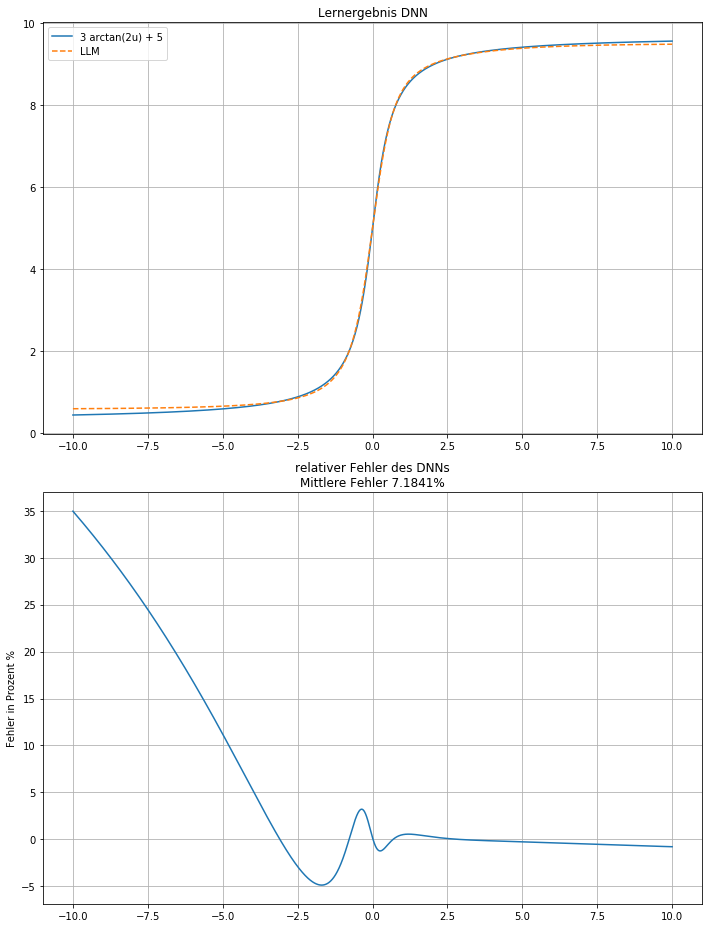

In [3]:
u = np.reshape(np.linspace(-10, 10, 5000), (5000, 1))
y_pred = model.predict(u)

fig = plt.figure(figsize=(10, 13))

plt.subplot(2,1,1)
plt.title(f"Lernergebnis DNN")
plt.grid(True)
plt.plot(u, nl(u), label=f"3 arctan(2u) + 5")
plt.plot(u, y_pred, '--', label="LLM")
#plt.xlim((-2, 2))
plt.legend()

plt.subplot(2,1,2)
plt.title(f"relativer Fehler des DNNs\nMittlere Fehler {np.abs(100*((y_pred/nl(u)) - 1)).mean():.4f}%")
plt.ylabel("Fehler in Prozent %")
plt.grid(True)
plt.plot(u, 100*((y_pred/nl(u)) - 1))
#plt.legend()

plt.tight_layout()
plt.show()